# ESTIMATING THE QUALITY OF WINES WITH REGRESSION TREES AND MODEL TREES

Rosa Karina Torres Calderon

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import pydotplus
from sklearn import metrics
from IPython.display import Image  
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz  
from sklearn import tree
import weka.core.jvm as jvm
import weka.core.converters as conv
from weka.classifiers import Classifier, Evaluation
from weka.core.classes import Random
from weka.core.converters import Loader

In [4]:
from sklearn.tree import _tree
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

# Step 1- Reading the data set

In [5]:
wine = pd.read_csv("winequality-white.csv")
print(wine.head(5))
print(" ")
print('Tamaño del data frame: ' + str(wine.shape))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

# Step 2- Exploring and preparing the data

In [6]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


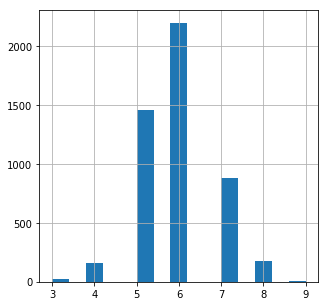

In [7]:
# Visualize the distribution of the wine quelity values
%matplotlib inline
wine['quality'].hist(bins = 15, figsize= (5,5))
plt.show()

Data preparation - creating training and test datasets

In [8]:
x_wine_train = wine.iloc[:3750,:11]
y_wine_train = wine.iloc[:3750,11:]
print()
x_wine_test = wine.iloc[3750:,:11]
y_wine_test = wine.iloc[3750:,11:]

print('Wine train: ' + str(x_wine_train.shape))
print('Wine test: ' + str(x_wine_test.shape))


Wine train: (3750, 11)
Wine test: (1148, 11)


# Step 3- Training a Model on the data

In [9]:
regressor = DecisionTreeRegressor(max_depth=3,random_state = 0) 
regressor.fit(x_wine_train, y_wine_train) 
#export_graphviz(regressor, out_file ='tree.dot', feature_names =['Production Cost'])

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

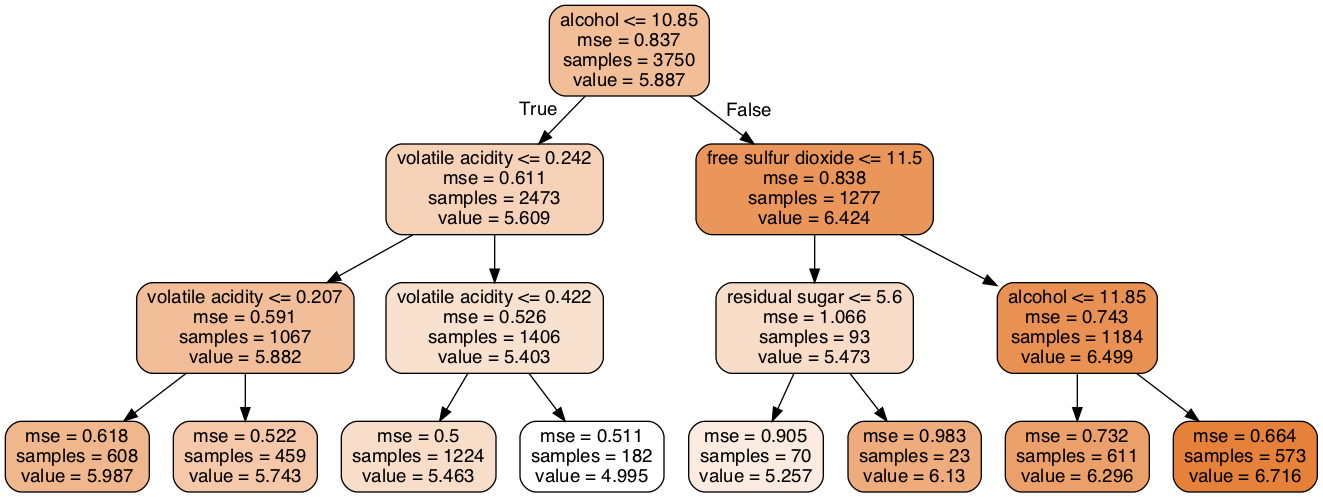

In [10]:
#Create DOT data
feature_names = list(x_wine_train.columns)
dot_data = io.StringIO()
export_graphviz(regressor, out_file = dot_data, filled = True, rounded = True, feature_names = feature_names)
# Draw graph
graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())
# Show graph
Image(graph.create_png())

In [11]:
# Extracting the decision rules from de decision tree 
tree_to_code(regressor, wine.columns)

def tree(fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality):
  if alcohol <= 10.849999904632568:
    if volatile acidity <= 0.24249999970197678:
      if volatile acidity <= 0.20749999582767487:
        return [[5.98684211]]
      else:  # if volatile acidity > 0.20749999582767487
        return [[5.74291939]]
    else:  # if volatile acidity > 0.24249999970197678
      if volatile acidity <= 0.42249999940395355:
        return [[5.46323529]]
      else:  # if volatile acidity > 0.42249999940395355
        return [[4.99450549]]
  else:  # if alcohol > 10.849999904632568
    if free sulfur dioxide <= 11.5:
      if residual sugar <= 5.599999904632568:
        return [[5.25714286]]
      else:  # if residual sugar > 5.599999904632568
        return [[6.13043478]]
    else:  # if free sulfur dioxide > 11.5
      if alcohol <= 11.849999904632568:
        return [[6.29623568]]
      el

# Step 4- Evaluating model performance

In [12]:
y_pred= regressor.predict(x_wine_test)
score = mean_absolute_error(y_wine_test,y_pred)
print(score)

0.5703166583653324
